In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import os
import time
import random


In [203]:
SIZE = 100

In [159]:
def get_image(font, digit):
    blank_img = np.zeros((SIZE, SIZE))

    pil_im = Image.fromarray(blank_img)

    draw = ImageDraw.Draw(pil_im)

    draw.text((0, 0), digit, fill=255, font=font)

    return cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)


In [144]:
def get_corners(img):
    top, bottom, left, right = SIZE, 0, SIZE, 0

    for r in range(SIZE):
        for c in range(SIZE):
            if img[r, c, 0] == 255:
                top = min(top, r)
                bottom = max(bottom, r)
                left = min(left, c)
                right = max(right, c)

    width, height = bottom - top, right - left

    return (top, bottom, left, right)


In [162]:
def get_digit(font_path, digit):
    font_size = int(0.75 * SIZE)
    font = ImageFont.truetype(font_path, font_size)

    digit_img = get_image(font, digit)

    corners = get_corners(digit_img)
    top, bottom, left, right = corners[0], corners[1], corners[2], corners[3]
    width, height = right - left, bottom - top

    digit_img = digit_img[top:bottom, left:right]

    return digit_img, (width, height)


In [199]:
def get_centered_digit(font_path, digit):
    cropped_digit = get_digit(font_path, digit)
    cropped_digit_img = cropped_digit[0]
    width, height = cropped_digit[1]

    left = (SIZE // 2) - (width // 2)
    right = (SIZE // 2) + (width // 2)
    if width % 2 == 1:
        right += 1

    top = (SIZE // 2) - (height // 2)
    bottom = (SIZE // 2) + (height // 2)
    if height % 2 == 1:
        bottom += 1

    adjusted_digit_img = np.zeros((SIZE, SIZE, 3))
    adjusted_digit_img[top:bottom, left:right] = cropped_digit_img

    return adjusted_digit_img


In [222]:
X_train = np.empty(shape=(0, SIZE * SIZE))
y_train = np.empty(shape=(0, ))

X_test = np.empty(shape=(0, SIZE * SIZE))
y_test = np.empty(shape=(0, ))


training_file_num = 0
testing_file_num = 0

for file in os.listdir('Fonts'):
    start = time.time()

    if random.randint(1, 5) != 1:
        is_training = True

        for i in range(1, 10):
            img = get_centered_digit(
                f"Fonts/{file}", str(i))[:, :, 0].flatten()
            img = np.array([img])

            X_train = np.append(X_train, img, axis=0)
            y_train = np.append(y_train, i)
    else:
        is_training = False

        for i in range(1, 10):
            img = get_centered_digit(
                f"Fonts/{file}", str(i))[:, :, 0].flatten()
            img = np.array([img])

            X_test = np.append(X_test, img, axis=0)
            y_test = np.append(y_test, i)

    if is_training == True:
        training_file_num += 1
        print(
            f"Training file number {training_file_num} finished({file}). "
            f"{round((training_file_num + testing_file_num) / 200 * 100, 2)}"
            f"% completed({round(time.time() - start, 2)}s)."
        )
    else:
        testing_file_num += 1
        print(
            f"Testing file number {testing_file_num} finished({file}). "
            f"{round((training_file_num + testing_file_num) / 200 * 100, 2)}"
            f"% completed({round(time.time() - start, 2)}s)."
        )

print("Saving...")
np.savetxt('X_train.csv', X_train)
np.savetxt('y_train.csv', y_train)

np.savetxt('X_test.csv', X_test)
np.savetxt('y_test.csv', y_test)
print("Saved to file!")

print(
    f"\nTraining:Testing\n"
    f"{int(round(training_file_num / (training_file_num + testing_file_num) * 100, 0))}:"
    f"{int(round(testing_file_num / (training_file_num + testing_file_num) * 100, 0))}"
)


Training file number 1 finished(AGENCYB.TTF). 0.5% completed(0.19s).
Training file number 2 finished(AGENCYR.TTF). 1.0% completed(0.19s).
Testing file number 1 finished(ANTQUAB.TTF). 1.5% completed(0.22s).
Training file number 3 finished(ANTQUABI.TTF). 2.0% completed(0.22s).
Testing file number 2 finished(ANTQUAI.TTF). 2.5% completed(0.19s).
Training file number 4 finished(ARIAL.TTF). 3.0% completed(0.22s).
Testing file number 3 finished(ARIALBD.TTF). 3.5% completed(0.21s).
Training file number 5 finished(ARIALBI.TTF). 4.0% completed(0.2s).
Training file number 6 finished(ARIALI.TTF). 4.5% completed(0.2s).
Testing file number 4 finished(ARIALN.TTF). 5.0% completed(0.2s).
Training file number 7 finished(ARIALNB.TTF). 5.5% completed(0.21s).
Testing file number 5 finished(ARIALNBI.TTF). 6.0% completed(0.21s).
Training file number 8 finished(ARIALNI.TTF). 6.5% completed(0.22s).
Training file number 9 finished(ARIBLK.TTF). 7.0% completed(0.22s).
Training file number 10 finished(ARLRDBD.TTF)

In [244]:
X_train = np.genfromtxt('X_train.csv')
X_train = X_train.reshape((X_train.shape[0], SIZE, SIZE))

y_train = np.genfromtxt('y_train.csv')
y_train = y_train.astype(int)


X_test = np.genfromtxt('X_test.csv')
X_test = X_test.reshape((X_test.shape[0], SIZE, SIZE))

y_test = np.genfromtxt('y_test.csv')
y_test = y_test.astype(int)


In [245]:
print(f"X_train shape: {X_train.shape}\n"
      f"y_train shape: {y_train.shape}\n"
      f"X_test shape: {X_test.shape}\n"
      f"y_test shape: {y_test.shape}"
      )


X_train shape: (1476, 100, 100)
y_train shape: (1476,)
X_test shape: (324, 100, 100)
y_test shape: (324,)


6


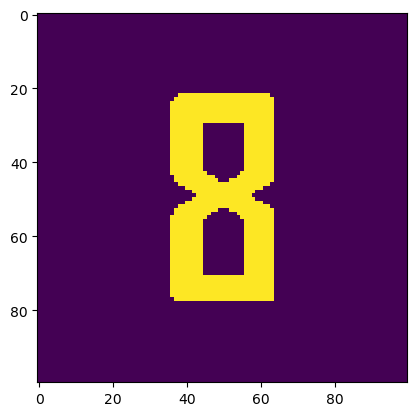

In [261]:
img1 = X_train[7]
# img1 = cv2.resize(img1, (50, 50))
# img1 = cv2.resize(img1, (200, 200))
plt.imshow(img1)
print(y_train[5])


1


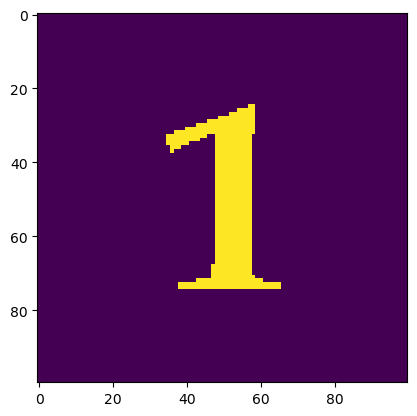

In [257]:
img2 = X_test[0]
plt.imshow(img2)
print(y_test[0])
